In [1]:
zero_shot = set(["nowiki", "huwiki", "dawiki", "bgwiki", "slwiki", "hrwiki", "hiwiki"]+\
['euwiki', 'mswiki', 'thwiki', 'eowiki', 'hywiki', 'kawiki', 'etwiki', 'ltwiki', 'shwiki', 'azwiki'])
len(zero_shot)

17

In [2]:
import pandas as pd
enwiki = pd.read_json("supervised_kt/stats_logistic.json", lines=True)
enwiki = enwiki[(enwiki.site=='enwiki')&(enwiki.elasticNetParam==0.0)&(enwiki.regParam==0.0)].drop_duplicates()[['site', 'areaUnderROC']]

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
transfer = pd.read_json("supervised_kt/stats_logistic_transfer.json", lines=True)
transfer = transfer[transfer.areaUnderROC>0]
transfer = transfer.loc[transfer.groupby(['site', 'label'])['areaUnderROC'].idxmax()][['site', 'areaUnderROC']]
transfer = transfer[~(transfer.site=='enwiki')]
transfer = transfer.append(enwiki)
transfer['tp'] = "Trained on English"
language_trained = pd.read_json("supervised_kt/stats_logistic_all_langs.json", lines=True).drop_duplicates()
language_trained = language_trained[language_trained.areaUnderROC>0]
language_trained = language_trained.loc[language_trained.groupby(['site', 'label'])['areaUnderROC'].idxmax()][['site', 'areaUnderROC']]
language_trained = language_trained[~(language_trained.site=='enwiki')]
language_trained = language_trained.append(enwiki)
language_trained['tp'] = "Trained on target lang."
all_data=transfer.append(language_trained)
all_data["site_short"] = all_data["site"].apply(lambda r: (r.replace("wiki", "")+("" if r in zero_shot else "")).rjust(3))

all_data = all_data[~(all_data.site.isin(zero_shot))].sort_values("site").reset_index(drop=True).append(
    all_data[all_data.site.isin(zero_shot)].sort_values("site").reset_index(drop=True))

all_data = all_data.reset_index(drop=True)

0.8582723605289583
0.8159965423856912
0.8411702353239574
0.7954559705896214


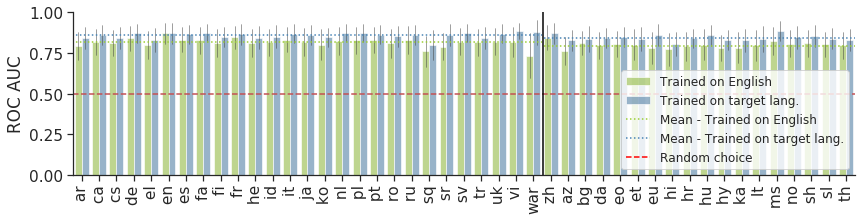

In [5]:
import seaborn as sns
from matplotlib.lines import Line2D

sns.set_context("paper")
sns.set(font_scale = 1.4, font="monospace")
sns.set_style("white", {
    "font.family": "monospace",
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})


palette ={transfer['tp'].unique()[0]:"yellowgreen",
          language_trained['tp'].unique()[0]:"steelblue"}


g = sns.catplot(x="site_short", y="areaUnderROC", hue="tp", data=all_data, ci='sd', errwidth=0.5,
                 kind="bar", legend=True, alpha=0.6, legend_out=False, palette=palette,
               )
g.fig.set_size_inches(15,3)

g.axes[0][0].axhline(y=0.5, linestyle='dashed', color="r")



m1 = language_trained[~(language_trained.site.isin(zero_shot))].groupby("site").mean().mean().areaUnderROC
print(m1)
x = [-1, 26.5]
y = [m1, m1]
line = Line2D(x, y, linestyle='dotted', color="steelblue")
g.axes[0][0].add_line(line)

m2 = transfer[~(transfer.site.isin(zero_shot))].groupby("site").mean().mean().areaUnderROC
print(m2)
x = [-1, 26.5]
y = [m2, m2]
line = Line2D(x, y, linestyle='dotted', color="yellowgreen")
g.axes[0][0].add_line(line)


m1 = language_trained[(language_trained.site.isin(zero_shot))].groupby("site").mean().mean().areaUnderROC
print(m1)
x = [26.6, 50]
y = [m1, m1]
line = Line2D(x, y, linestyle='dotted', color="steelblue")
g.axes[0][0].add_line(line)

m2 = transfer[(transfer.site.isin(zero_shot))].groupby("site").mean().mean().areaUnderROC
print(m2)
x = [26.6, 50]
y = [m2, m2]
line = Line2D(x, y, linestyle='dotted', color="yellowgreen")
g.axes[0][0].add_line(line)

average_transfer=Line2D([], [], color='yellowgreen', linestyle='dotted')
average_trained=Line2D([], [], color='steelblue', linestyle='dotted')
random=Line2D([], [], color='red', linestyle='dashed')


g.axes[0][0].axvline(x=26.55, 
                     linestyle='-', color="black", alpha=1)

handles, labels = g.axes[0][0].get_legend_handles_labels()

plt.legend(handles+[average_transfer, average_trained, random], 
           labels+['Mean - Trained on English', 'Mean - Trained on target lang.', 'Random choice'],
           loc='lower right', title="", prop={'size': 12})



g.set_ylabels("ROC AUC")
g.set_xlabels("")
plt.xticks(rotation=90)

plt.savefig("supervised_transfer_learning.pdf", bbox_inches = 'tight', pad_inches = 0)

0.8582723605289583
0.8159965423856912


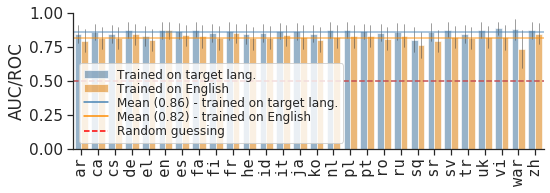

In [6]:
import seaborn as sns
from matplotlib.lines import Line2D

sns.set_context("paper")
sns.set(font_scale = 1.4, font="monospace")
sns.set_style("white", {
    "font.family": "monospace",
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

palette ={transfer['tp'].unique()[0]:"darkorange",
          language_trained['tp'].unique()[0]:"steelblue"}


g = sns.catplot(x="site_short", y="areaUnderROC", hue="tp", data=all_data[~(all_data.site.isin(zero_shot))], 
                ci='sd', errwidth=0.5,
                hue_order=["Trained on target lang.","Trained on English"],
                 kind="bar", legend=True, alpha=0.6, legend_out=False, palette=palette)
g.fig.set_size_inches(9,2.5)


g.axes[0][0].axhline(y=0.5, linestyle='dashed', color="r")



m1 = language_trained[~(language_trained.site.isin(zero_shot))].groupby("site").mean().mean().areaUnderROC
print(m1)
x = [-1, 27.5]
y = [m1, m1]
line = Line2D(x, y, linestyle='solid', color="steelblue", alpha=0.6)
g.axes[0][0].add_line(line)

m2 = transfer[~(transfer.site.isin(zero_shot))].groupby("site").mean().mean().areaUnderROC
print(m2)
x = [-1, 27.5]
y = [m2, m2]
line = Line2D(x, y, linestyle='solid', color="darkorange", alpha=0.6)
g.axes[0][0].add_line(line)
g.axes[0][0].set_ylim((0,1))

average_transfer=Line2D([], [], color='darkorange', linestyle='solid')
average_trained=Line2D([], [], color='steelblue', linestyle='solid')
random=Line2D([], [], color='red', linestyle='dashed')

handles, labels = g.axes[0][0].get_legend_handles_labels()



average_transfer=Line2D([], [], color='darkorange', linestyle='solid')
average_trained=Line2D([], [], color='steelblue', linestyle='solid')
random=Line2D([], [], color='red', linestyle='dashed')


handles, labels = g.axes[0][0].get_legend_handles_labels()

plt.legend(handles+[average_trained, average_transfer, random], 
           labels+['Mean ({:.2f}) - trained on target lang.'.format(m1)
                   , 'Mean ({:.2f}) - trained on English'.format(m2), 'Random guessing'],
           loc='lower left', title="", prop={'size': 12}, labelspacing=.1)

g.set_ylabels("AUC/ROC")
g.set_xlabels("")
# g.fig.suptitle('(a) 28 languages seen during WikiPDA training', fontsize=12, y=0.94, x=0.57)

plt.xticks(rotation=90, family=['courier new', 'monospace'])

plt.savefig("supervised_transfer_learning_28original.pdf", bbox_inches = 'tight', pad_inches = 0)

0.8411702353239574
0.7954559705896214


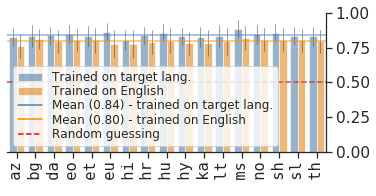

In [11]:
import seaborn as sns
from matplotlib.lines import Line2D

sns.set_context("paper")
sns.set(font_scale = 1.4, font="monospace")
sns.set_style("white", {
    "font.family": "monospace",
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})


palette ={transfer['tp'].unique()[0]:"darkorange",
          language_trained['tp'].unique()[0]:"steelblue"}


g = sns.catplot(x="site_short", y="areaUnderROC", hue="tp", data=all_data[(all_data.site.isin(zero_shot))], 
                ci='sd', errwidth=0.5,
                hue_order=["Trained on target lang.","Trained on English"],
                 kind="bar", legend=True, alpha=0.6, legend_out=False, palette=palette)
g.fig.set_size_inches(6,2.5)


g.axes[0][0].axhline(y=0.5, linestyle='dashed', color="r")



m1 = language_trained[(language_trained.site.isin(zero_shot))].groupby("site").mean().mean().areaUnderROC
print(m1)
x = [-1, 26.5]
y = [m1, m1]
line = Line2D(x, y, linestyle='solid', color="steelblue", alpha=0.6)
g.axes[0][0].add_line(line)

m2 = transfer[(transfer.site.isin(zero_shot))].groupby("site").mean().mean().areaUnderROC
print(m2)
x = [-1, 26.5]
y = [m2, m2]
line = Line2D(x, y, linestyle='solid', color="darkorange", alpha=0.6)
g.axes[0][0].add_line(line)
g.axes[0][0].set_ylim((0,1))

g.axes[0][0].yaxis.set_label_position("right")
g.axes[0][0].yaxis.tick_right()

g.axes[0][0].spines['left'].set_visible(False)
g.axes[0][0].spines['right'].set_visible(True)

average_transfer=Line2D([], [], color='darkorange', linestyle='solid')
average_trained=Line2D([], [], color='steelblue', linestyle='solid')
random=Line2D([], [], color='red', linestyle='dashed')

handles, labels = g.axes[0][0].get_legend_handles_labels()



average_transfer=Line2D([], [], color='darkorange', linestyle='solid')
average_trained=Line2D([], [], color='steelblue', linestyle='solid')
random=Line2D([], [], color='red', linestyle='dashed')


handles, labels = g.axes[0][0].get_legend_handles_labels()

plt.legend(handles+[average_trained, average_transfer, random], 
           labels+['Mean ({:.2f}) - trained on target lang.'.format(m1)
                   , 'Mean ({:.2f}) - trained on English'.format(m2), 'Random guessing'],
           loc='lower left', title="", prop={'size': 12}, labelspacing=.1)



g.set_ylabels("")
g.set_xlabels("")
plt.xticks(rotation=90, family=['courier new', 'monospace'])

plt.savefig("supervised_transfer_learning_zeroshot.pdf", bbox_inches = 'tight', pad_inches = 0)